- 해당 코드 돌리기 전에 비디오 다이콤 > avi형태로 변환 > png 파일로 변환 완료후 실행

In [1]:
import pandas as pd
import re

In [4]:
TS_df = pd.read_excel('/data2/hoon2/LUS_Dataset/csv_files/Temporally_separated_sheet.xlsx', index_col=False)

print(len(TS_df))

366


In [5]:
TS_df

,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score Leader,Lung Ultrasound Score Final
0,1.0,44937986.0,2.0,20240712.0,video,NaN,1_152,NaN,NaN,NaN,NaN,1.0,0,NaN
1,1.0,44937986.0,3.0,20240712.0,video,NaN,NaN,NaN,NaN,"1_49, 75_124","1_41, 79_119",0.0,3ce,NaN
2,1.0,44937986.0,4.0,20240712.0,video,NaN,NaN,NaN,NaN,"1_24, 44_100, 121_150","1_19, 51_96, 131_148",0.0,3ce,NaN
3,1.0,44937986.0,5.0,20240712.0,video,NaN,"1_47, 54_126, 133_152","7_37, 80_114","47_59, 127_137",NaN,NaN,1.0,2,NaN
4,1.0,44937986.0,6.0,20240712.0,video,NaN,1_152,"41_61, 132_137","10_22, 66_72, 90_101, 147_151",NaN,NaN,1.0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
TS_df['A-line'] = TS_df['A-line'].map(lambda x: x if pd.isna(x) else x.strip())
TS_df['A-line'] = TS_df['A-line'].replace('', pd.NA, inplace=False)

TS_df['B-line'] = TS_df['B-line'].map(lambda x: x if pd.isna(x) else x.strip())
TS_df['B-line'] = TS_df['B-line'].replace('', pd.NA, inplace=False)

TS_df['Confluent B-line'] = TS_df['Confluent B-line'].map(lambda x: x if pd.isna(x) else x.strip())
TS_df['Confluent B-line'] = TS_df['Confluent B-line'].replace('', pd.NA, inplace=False)

TS_df['Consolidation'] = TS_df['Consolidation'].map(lambda x: x if pd.isna(x) else x.strip())
TS_df['Consolidation'] = TS_df['Consolidation'].replace('', pd.NA, inplace=False)

TS_df['Pleural effusion'] = TS_df['Pleural effusion'].map(lambda x: x if pd.isna(x) else x.strip())
TS_df['Pleural effusion'] = TS_df['Pleural effusion'].replace('', pd.NA, inplace=False)

In [174]:
print(len(TS_df))

56


In [175]:
len(TS_df[TS_df.Data_type=='image'])
TS_df.Data_type.value_counts()

video    56
Name: Data_type, dtype: int64

In [176]:
TS_df.head()

,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score Leader,Lung Ultrasound Score Final
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,NaN,1,0,NaN
1,1,44937986,3,20240712,video,NaN,NaN,NaN,NaN,"1_49, 75_124","1_41, 79_119",0,3ce,NaN
2,1,44937986,4,20240712,video,NaN,NaN,NaN,NaN,"1_24, 44_100, 121_150","1_19, 51_96, 131_148",0,3ce,NaN
3,1,44937986,5,20240712,video,NaN,"1_47, 54_126, 133_152","7_37, 80_114","47_59, 127_137",NaN,NaN,1,2,NaN
4,1,44937986,6,20240712,video,NaN,1_152,"41_61, 132_137","10_22, 66_72, 90_101, 147_151",NaN,NaN,1,2,NaN


In [177]:
TS_video_df = TS_df[TS_df['Data_type'] != 'image']
print(len(TS_video_df))

56


In [178]:
def create_row(row):
    root_path = "/home/workspace2/LUS/Dataset/processed_temporally_separated_dataset_dcm"
    patient_id = int(row['PatientID'])
    data_idx = int(row['Data_idx'])
#     data_idx = f"{row['Data_idx']:05d}"
    return f"{patient_id}_{data_idx}"

In [179]:
TS_video_df['study_id'] = TS_video_df.apply(create_row, axis=1)
TS_video_df.head()

,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score Leader,Lung Ultrasound Score Final,study_id
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,NaN,1,0,NaN,44937986_2
1,1,44937986,3,20240712,video,NaN,NaN,NaN,NaN,"1_49, 75_124","1_41, 79_119",0,3ce,NaN,44937986_3
2,1,44937986,4,20240712,video,NaN,NaN,NaN,NaN,"1_24, 44_100, 121_150","1_19, 51_96, 131_148",0,3ce,NaN,44937986_4
3,1,44937986,5,20240712,video,NaN,"1_47, 54_126, 133_152","7_37, 80_114","47_59, 127_137",NaN,NaN,1,2,NaN,44937986_5
4,1,44937986,6,20240712,video,NaN,1_152,"41_61, 132_137","10_22, 66_72, 90_101, 147_151",NaN,NaN,1,2,NaN,44937986_6


# load png file paths

In [180]:
from tqdm import tqdm

In [181]:
from glob import glob

all_png_paths = glob('/home/work/LUS/Dataset/temporally_separated_dcm_to_png/*/*.png')

In [182]:
print(len(all_png_paths))

8508


In [183]:
all_png_paths[0]
match = re.match(r'(\d+_\d+)_\d+', all_png_paths[0].split('/')[-1].split('.')[0])
match.group(1)

'44937986_00002'

In [184]:
data2 = []

# 이미지 case는 제외하기 위해
pattern = re.compile(r'(\d+_\d+)_\d+')

for i in tqdm(range(len(all_png_paths))):
    file_name = all_png_paths[i].split('/')[-1].split('.')[0]
    study_id = pattern.match(file_name)
    if study_id:
        
        p1 = study_id.group(1).split('_')[0]
        p2 = int(study_id.group(1).split('_')[1])
        revised_study_id = f"{p1}_{p2}"
        
        data2.append({
            'FileName': file_name,
            'study_id': revised_study_id
        })

png_df = pd.DataFrame(data2, columns=['FileName', 'study_id'])

100% 8508/8508 [00:00<00:00, 350166.70it/s]


In [185]:
png_df.head()

,FileName,study_id
0,44937986_00002_1,44937986_2
1,44937986_00002_2,44937986_2
2,44937986_00002_3,44937986_2
3,44937986_00002_4,44937986_2
4,44937986_00002_5,44937986_2


# png csv, labeling csv merge
- 2차 labeling
    - version_1에서 동일한 영역이 없어서 제외한 case : study_id : 61398238_4, 61398238_7

In [186]:
# 두 데이터프레임의 공통된 'study_id' 값 찾기
common_study_ids = set(TS_video_df['study_id']).intersection(set(png_df['study_id']))

# 공통된 'study_id'만 포함하도록 각 데이터프레임 필터링
TS_video_df_filtered = TS_video_df[TS_video_df['study_id'].isin(common_study_ids)]
TS_png_df_filtered = png_df[png_df['study_id'].isin(common_study_ids)]

# 필터링된 데이터프레임 병합
TS_merged_video_df = pd.merge(TS_video_df_filtered, TS_png_df_filtered, on='study_id')
print(len(TS_merged_video_df))
print(f"Tempollary_Separated 환자 수 : {len(set(TS_merged_video_df['PatientID']))}")
print(f"Tempollary_Separated 추가된 비디오 수 : {len(set(TS_merged_video_df['study_id']))}")
print(f"Tempollary_Separated 추가된 이미지 수 : {len(set(TS_merged_video_df['FileName']))}")

8508
Tempollary_Separated 환자 수 : 11
Tempollary_Separated 추가된 비디오 수 : 56
Tempollary_Separated 추가된 이미지 수 : 8508


In [187]:
nan_rows = TS_merged_video_df[TS_merged_video_df['FileName'].isna()]

In [188]:
nan_rows['study_id'].value_counts()

Series([], Name: study_id, dtype: int64)

In [189]:
TS_merged_video_df = TS_merged_video_df.dropna(subset='FileName', inplace=False)
print(len(TS_merged_video_df))

8508


In [190]:
def create_list(start, end=None):
    # If only one number is provided, return a list with that number.
    if end is None:
        return [int(start)]
    # If start and end are provided, return a list with numbers from start to end, inclusive.
    else:
        return list(range(int(start), int(end) + 1))

In [191]:
def gen_lbl_range_dict(df, lbl_name):
    lbl_dict = {}
    for si, lbl in df[['study_id',lbl_name]].values:
        lbl_range_ls = []
        if pd.isna(lbl):
            lbl_dict[si] = 0
        else:
            refined_lbl = lbl.strip()
            refined_lbl_ls = refined_lbl.split(',')
            for r_lbl in refined_lbl_ls:
                lbl_range = re.split(r'[_-]', r_lbl)
                lbl_range_ls.append(create_list(*lbl_range))   
            lbl_dict[si] = lbl_range_ls  
    return lbl_dict       

In [192]:
al_lbl_dict = gen_lbl_range_dict(TS_merged_video_df, 'A-line')
bl_lbl_dict = gen_lbl_range_dict(TS_merged_video_df, 'B-line')
cb_lbl_dict = gen_lbl_range_dict(TS_merged_video_df, 'Confluent B-line')
c_lbl_dict = gen_lbl_range_dict(TS_merged_video_df, 'Consolidation')
pe_lbl_dict = gen_lbl_range_dict(TS_merged_video_df, 'Pleural effusion')

In [193]:
def check_label_in_range(filename, label_range_dict):
    file_info = filename.split('_')
    study_id = '_'.join([file_info[0], str(int(file_info[1]))])
    frame_idx = int(file_info[-1])
    lbl_range_ls = label_range_dict[study_id]
    if lbl_range_ls == 0:
        return 0
    else:
        for lbl_range in lbl_range_ls:
            if frame_idx in lbl_range:
                return 1
        return 0

In [194]:
def check_study_id(filename):
    file_info = filename.split('_')
    study_id = '_'.join([file_info[0], str(int(file_info[1]))])
    return study_id

In [195]:
TS_merged_video_df.head()

,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,Lung Ultrasound Score Leader,Lung Ultrasound Score Final,study_id,FileName
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,NaN,1,0,NaN,44937986_2,44937986_00002_1
1,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,NaN,1,0,NaN,44937986_2,44937986_00002_2
2,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,NaN,1,0,NaN,44937986_2,44937986_00002_3
3,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,NaN,1,0,NaN,44937986_2,44937986_00002_4
4,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,NaN,1,0,NaN,44937986_2,44937986_00002_5


In [196]:
TS_merged_video_df['A-line_lbl'] = TS_merged_video_df.FileName.map(lambda x: check_label_in_range(x, al_lbl_dict))
TS_merged_video_df['B-line_lbl'] = TS_merged_video_df.FileName.map(lambda x: check_label_in_range(x, bl_lbl_dict))
TS_merged_video_df['Confluent B-line_lbl'] = TS_merged_video_df.FileName.map(lambda x: check_label_in_range(x, cb_lbl_dict))
TS_merged_video_df['Consolidation_lbl'] = TS_merged_video_df.FileName.map(lambda x: check_label_in_range(x, c_lbl_dict))
TS_merged_video_df['Pleural effusion_lbl'] = TS_merged_video_df.FileName.map(lambda x: check_label_in_range(x, pe_lbl_dict))

In [197]:
def create_path(row):
    root_path = "/home/work/LUS/Dataset/temporally_separated_dcm_to_png"
    patient_id = int(row['PatientID'])
    File_name = row['FileName']
    data_idx = row['FileName'].split('_')[1]
    frame_num =  row['FileName'].split('_')[-1]
    return f"{root_path}/{patient_id}/{str(patient_id)}_{str(data_idx).zfill(5)}_{str(frame_num)}.png"

In [198]:
TS_merged_video_df['img_path'] = TS_merged_video_df.apply(create_path, axis=1)

print(TS_merged_video_df.iloc[0]['img_path'])

/home/work/LUS/Dataset/temporally_separated_dcm_to_png/44937986/44937986_00002_1.png


In [199]:
score_cols = {'A-line_lbl':0, 
              'B-line_lbl':1, 
              'Confluent B-line_lbl':2, 
              'Consolidation_lbl':3, 
              'Pleural effusion_lbl':3}

def assign_LUS_score(row):
    # 각 레이블에 대해 점수 계산
    scores = []
    for label, score in score_cols.items():
        if row[label] > 0:  # 레이블이 존재하는 경우
            scores.append(score)
    # 가장 높은 점수 반환, 레이블이 없는 경우 기본값으로 가장 낮은 점수 할당
    return max(scores) if scores else 4

In [200]:
TS_merged_video_df['Lung ultrasound score_lbl'] = TS_merged_video_df.apply(assign_LUS_score, axis=1)

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
value_counts = TS_merged_video_df['Lung ultrasound score_lbl'].value_counts().sort_index()

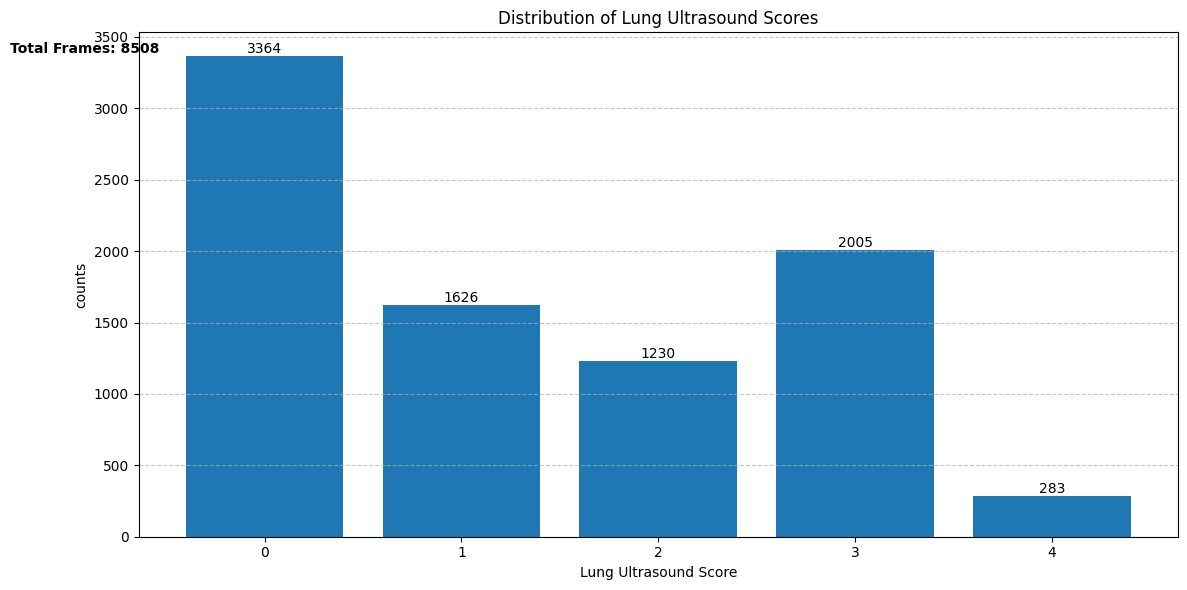

In [203]:
plt.figure(figsize=(12, 6))
bars = plt.bar(value_counts.index, value_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Distribution of Lung Ultrasound Scores')
plt.xlabel('Lung Ultrasound Score')
plt.ylabel('counts')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Total frame 수 계산
total_frames = value_counts.sum()

# Total frame 수를 그래프 왼쪽 위에 표시
plt.text(0.02, 0.98, f'Total Frames: {total_frames}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right',
         fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

- 5 artifacts
    - A-line / B-line, confluent B-line / Consolidation / Effusion / No findings

In [204]:
# score 4 제외
TS_merged_video_df['total-B-line_lbl'] = ((TS_merged_video_df['B-line_lbl'] == 1) | (TS_merged_video_df['Confluent B-line_lbl'] == 1)).astype(int)

print(len(TS_merged_video_df))
print(len(TS_merged_video_df[TS_merged_video_df['Lung ultrasound score_lbl'] == 4]))
print(len(TS_merged_video_df[TS_merged_video_df['Lung ultrasound score_lbl'] != 4]))

8508
283
8225


In [205]:
import os

if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/image/5_artifacts'):
    os.makedirs(f'/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/image/5_artifacts')
TS_merged_video_df.to_csv(f"/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/image/5_artifacts/temporally_separated_test.csv", index=False)

In [206]:
TS_merged_video_df.head()

,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,...,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,total-B-line_lbl
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0
1,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_2,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0
2,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_3,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0
3,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_4,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0
4,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_5,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0


- 4 artifacts
    - A-line / B-line, confluent B-line / Consolidation / Effusion

In [207]:
class_4_new_df = TS_merged_video_df[TS_merged_video_df['Lung ultrasound score_lbl'] != 4]
class_4_new_df['total-B-line_lbl'] = ((class_4_new_df['B-line_lbl'] == 1) | (class_4_new_df['Confluent B-line_lbl'] == 1)).astype(int)

new_column_order = [
    'PatientID', 'Data_idx', 'StudyDate', 'Data_type', 'A-line', 'B-line',
    'Confluent B-line', 'Consolidation', 'Pleural effusion', 'Lung sliding',
    'Lung Ultrasound Score', 'study_id', 'FileName', 'A-line_lbl',
    'B-line_lbl', 'Confluent B-line_lbl', 'total-B-line_lbl', 'Consolidation_lbl',
    'Pleural effusion_lbl', 'img_path', 'Lung ultrasound score_lbl',
    'raw_avi_path'
]

print(len(TS_merged_video_df))
print(len(class_4_new_df))
class_4_new_df = class_4_new_df.reindex(columns=new_column_order)
class_4_new_df.head()

8508
8225


/tmp/ipykernel_4033221/3046644541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_4_new_df['total-B-line_lbl'] = ((class_4_new_df['B-line_lbl'] == 1) | (class_4_new_df['Confluent B-line_lbl'] == 1)).astype(int)


,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_1,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN
1,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_2,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN
2,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_3,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN
3,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_4,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN
4,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_5,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN


In [208]:
class_4_new_df['img_path'].iloc[0]

'/home/work/LUS/Dataset/temporally_separated_dcm_to_png/44937986/44937986_00002_1.png'

In [209]:
if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/image/4_artifacts'):
    os.makedirs(f'/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/image/4_artifacts')
class_4_new_df.to_csv(f"/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/image/4_artifacts/temporally_separated_test.csv", index=False)

# video

In [210]:
import cv2
from tqdm import tqdm
import re
import os
import sys
import cv2
import math
import time
import shutil

import pandas as pd
import numpy as np

In [211]:
def create_raw_avi_path(row):
    parts = row['FileName'].split('_')
    return f"/home/work/LUS/Dataset/processed_temporally_separated_dataset_avi/{parts[0]}/{parts[1]}.avi"

In [212]:
TS_merged_video_df.head()

,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,...,study_id,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,total-B-line_lbl
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0
1,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_2,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0
2,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_3,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0
3,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_4,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0
4,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_2,44937986_00002_5,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0


In [213]:
TS_merged_video_df['raw_avi_path'] = TS_merged_video_df.apply(create_raw_avi_path, axis=1)

In [214]:
print(TS_merged_video_df.iloc[0]['raw_avi_path'])
TS_merged_video_df.head()

/home/work/LUS/Dataset/processed_temporally_separated_dataset_avi/44937986/00002.avi


,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,total-B-line_lbl,raw_avi_path
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
1,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_2,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
2,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_3,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
3,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_4,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
4,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_5,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...


In [215]:
print(len(set(list(TS_merged_video_df['raw_avi_path']))))

56


In [216]:
print(len(TS_merged_video_df))
TS_merged_video_df.head()

8508


,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,total-B-line_lbl,raw_avi_path
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
1,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_2,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
2,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_3,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
3,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_4,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
4,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_5,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...


## raw video에서 clip 형성

In [218]:
import imageio

In [219]:
TS_video_df = TS_merged_video_df.drop_duplicates(subset=['study_id'])

print(len(TS_video_df))
TS_video_df.head()

56


,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,total-B-line_lbl,raw_avi_path
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
152,1,44937986,3,20240712,video,NaN,NaN,NaN,NaN,"1_49, 75_124",...,44937986_00003_1,0,0,0,1,1,/home/work/LUS/Dataset/temporally_separated_dc...,3,0,/home/work/LUS/Dataset/processed_temporally_se...
304,1,44937986,4,20240712,video,NaN,NaN,NaN,NaN,"1_24, 44_100, 121_150",...,44937986_00004_1,0,0,0,1,1,/home/work/LUS/Dataset/temporally_separated_dc...,3,0,/home/work/LUS/Dataset/processed_temporally_se...
456,1,44937986,5,20240712,video,NaN,"1_47, 54_126, 133_152","7_37, 80_114","47_59, 127_137",NaN,...,44937986_00005_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
608,1,44937986,6,20240712,video,NaN,1_152,"41_61, 132_137","10_22, 66_72, 90_101, 147_151",NaN,...,44937986_00006_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...


In [220]:
TS_video_df['study_id'].value_counts()
TS_raw_avi_paths = [i for i in TS_video_df['raw_avi_path']]

print(len(TS_raw_avi_paths))

56


In [139]:
def resize_ratio(img, img_resolution):
    # 만약 img_path가 들어올 경우 아래 코드 실행
    # pic_1 = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    resized_pic = np.zeros((img_resolution, img_resolution, 3), np.uint8)
    h,w = img.shape[:2]
    
    ash = img_resolution/h
    asw = img_resolution/w
    if asw<ash:
        sizeas=(int(w*asw),int(h*asw))
    else:
        sizeas=(int(w*ash),int(h*ash))
        
    img = cv2.resize(img,dsize=sizeas)
    resized_pic[int(img_resolution/2-sizeas[1]/2):int(img_resolution/2+sizeas[1]/2),
    int(img_resolution/2-sizeas[0]/2):int(img_resolution/2+sizeas[0]/2),:]=img
    
    return resized_pic

In [140]:
def add_frame(org_clip, org_frame_num, desired_frame_num, add_frame_mode):
    """
    프레임 수를 늘리는 함수: 원하는 프레임 수에 맞게 프레임을 추가합니다.
    
    Parameters:
    - org_clip: np.array, 원본 클립의 프레임 배열
    - org_frame_num: int, 원본 클립의 프레임 수
    - desired_frame_num: int, 원하는 프레임 수
    - add_frame_mode: str, 프레임 추가 모드 ('black' 또는 'duplicate')
    
    Returns:
    - new_clip: np.array, 수정된 클립의 프레임 배열
    """
    if add_frame_mode == 'black':
                
        new_clip = np.zeros((desired_frame_num, *org_clip.shape[1:]), dtype=org_clip.dtype)

        # 검은색 프레임 생성
        black_frame = np.zeros_like(org_clip[0])
    
        mid_point = (desired_frame_num - org_frame_num) // 2
        new_clip[mid_point:mid_point + org_frame_num] = org_clip
        
        return new_clip
        
    elif add_frame_mode == 'duplicate':
        
        new_clip = np.zeros((desired_frame_num, *org_clip.shape[1:]), dtype=org_clip.dtype)
        
        new_clip[:org_frame_num] = org_clip
        new_clip[org_frame_num:] = org_clip[-1]
        
        return new_clip

In [141]:
def generate_clips_with_overlap(clip_path, clip_length, overlap_percent, add_frame_type):

    # original video 정보 추출
#     cap = cv2.VideoCapture(clip_path)
    reader = imageio.get_reader(clip_path)
    
    frames = []
    for frame in reader:
        frames.append(frame)

    np_video = np.array(frames)
    reader.close()
#     width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#     height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
#     fps = cap.get(cv2.CAP_PROP_FPS)

#     # 새로운 video 생성
#     np_video = np.empty((int(count), int(height), int(width), 3), dtype=np.uint8)
    
#     # 비디오의 각 프레임을 NumPy 배열로 읽어와 저장
#     for i in range(int(count)):
#         ret, frame = cap.read()
#         if ret:
#             np_video[i] = frame
#         else:
#             break

#     cap.release()
    
    # clip & clip frame idx 추출
    clips_frame_idxs = []
    clips = []
    
    step = int(clip_length * (1 - overlap_percent))  # 오버랩을 고려한 스텝 계산
    
    for start_frame in range(0, len(np_video), step):
        end_frame = min(start_frame + clip_length, len(np_video))
        org_clip = np_video[start_frame:end_frame]
        
        if end_frame - start_frame < clip_length:
            # end_frame - start_frame : 현재 clip의 frame 갯수
            padded_clip = add_frame(org_clip, end_frame - start_frame, clip_length, add_frame_type)
#             print(padded_clip.shape)
            clips.append(padded_clip)
            clips_frame_idxs.append((start_frame, end_frame-1))        
        else:
#             print(org_clip.shape)
            clips.append(org_clip)
            
            clips_frame_idxs.append((start_frame, end_frame-1))        
            
    return clips, clips_frame_idxs

In [54]:
def make_roi_avi(df, destination_folder_path, add_frame_type, size):
    
    fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
    
    for idx, row in tqdm(df.iterrows()):
        
        # original video 정보 추출
        clip_path = row['raw_avi_path']
        clip_length = 30
        overlap_percent = 0.2
        add_frame_type = 'duplicate'
        
#         reader = imageio.get_reader(clip_path)
    
#         frames = []
#         for frame in reader:
#             frames.append(frame)

#         np_video = np.array(frames)
    #########
#         cap = cv2.VideoCapture(clip_path)
#         width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#         height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#         count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
#         fps = cap.get(cv2.CAP_PROP_FPS)
        
#         cap.release()
        
        clips, clips_frame_idxs = generate_clips_with_overlap(clip_path, clip_length, overlap_percent, add_frame_type)
        
        file_name = str(row['FileName'].rsplit('_', 1)[0]) + '.avi'
        
#         video_filename = os.path.join(destination_folder_path, file_name)
        
        # Ensure the patient's folder exists
        # if not os.path.exists(patient_folder):
        #     os.makedirs(patient_folder)
        # print(clips_frame_idxs)
        for i, clip in enumerate(clips):
            
            clip_start_idx, clip_end_idx = clips_frame_idxs[i][0], clips_frame_idxs[i][1]
            
            file_clip_idxs = str(f"{clip_start_idx+1}_{clip_end_idx+1}")
            file_name = str(row['FileName'].rsplit('_', 1)[0]) 
            
            video_filename = f"{file_name}_{file_clip_idxs}.avi"
            
            video_file_path = os.path.join(destination_folder_path, video_filename)
            
            if not os.path.exists(destination_folder_path):
                os.makedirs(destination_folder_path, exist_ok=True)
                
            height, width, _ = clip.shape[1:]

            out = cv2.VideoWriter(video_file_path, fourcc, 30, (int(size), int(size)))

            for i in range(len(clip)):
                
                resized_frame = resize_ratio(clip[i], size)
                out.write(resized_frame)
#             print(f'clip_file_name : {video_filename}, shape : {clip.shape}')
            out.release()
        
    return None

In [54]:
TS_video_df['raw_avi_path'].iloc[1]
TS_video_df.head()
print(len(TS_video_df['raw_avi_path']))

56


In [159]:
destination_folder_path = '/home/work/LUS/Dataset/clip_avi_temporally_separated_dataset'

df = TS_video_df
add_frame_type = 'duplicate'
size = 256

make_roi_avi(df, destination_folder_path, add_frame_type, size)

56it [01:13,  1.31s/it]


# Clip
- 위의 과정을 통해 만들어진 clip 중 해당 clip의 score가 4인 경우 어떠한 artifacts도 보이지 않기 때문에 제외

In [221]:
TS_video_df['raw_avi_path'].iloc[0]

'/home/work/LUS/Dataset/processed_temporally_separated_dataset_avi/44937986/00002.avi'

In [222]:
from glob import glob

TS_clip_root_paths = '/home/work/LUS/Dataset/clip_avi_temporally_separated_dataset'

TS_clip_paths = glob(f'{TS_clip_root_paths}/*.avi')

print(len(TS_clip_paths))

392


In [223]:
def create_list(start, end=None):
    # If only one number is provided, revalue_counts list with that number.
    if end is None:
        return [int(start)]
    # If start and end are provided, return a list with numbers from start to end, inclusive.
    else:

        return list(range(int(start), int(end) + 1))
#         return list(range(int(start)-1, int(end)))

In [224]:
def gen_lbl_range_dict(df, lbl_name):
    lbl_dict = {}
    for si, lbl in df[['study_id',lbl_name]].values:
        lbl_range_ls = []
        if pd.isna(lbl):
            lbl_dict[si] = [[0]]
        else:
            refined_lbl = lbl.strip()
            refined_lbl_ls = refined_lbl.split(',')
            for r_lbl in refined_lbl_ls:
                lbl_range = re.split(r'[_-]', r_lbl)
                lbl_range_ls.append(create_list(*lbl_range))   
            lbl_dict[si] = lbl_range_ls  
    return lbl_dict   

In [225]:
al_lbl_dict = gen_lbl_range_dict(TS_video_df, 'A-line')
bl_lbl_dict = gen_lbl_range_dict(TS_video_df, 'B-line')
cb_lbl_dict = gen_lbl_range_dict(TS_video_df, 'Confluent B-line')
c_lbl_dict = gen_lbl_range_dict(TS_video_df, 'Consolidation')
pe_lbl_dict = gen_lbl_range_dict(TS_video_df, 'Pleural effusion')

In [227]:
# al_lbl_dict

In [228]:
TS_video_df.head()

,Patient \nnumber,PatientID,Data_idx,StudyDate,Data_type,Point Zone,A-line,B-line,Confluent B-line,Consolidation,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,total-B-line_lbl,raw_avi_path
0,1,44937986,2,20240712,video,NaN,1_152,NaN,NaN,NaN,...,44937986_00002_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
152,1,44937986,3,20240712,video,NaN,NaN,NaN,NaN,"1_49, 75_124",...,44937986_00003_1,0,0,0,1,1,/home/work/LUS/Dataset/temporally_separated_dc...,3,0,/home/work/LUS/Dataset/processed_temporally_se...
304,1,44937986,4,20240712,video,NaN,NaN,NaN,NaN,"1_24, 44_100, 121_150",...,44937986_00004_1,0,0,0,1,1,/home/work/LUS/Dataset/temporally_separated_dc...,3,0,/home/work/LUS/Dataset/processed_temporally_se...
456,1,44937986,5,20240712,video,NaN,"1_47, 54_126, 133_152","7_37, 80_114","47_59, 127_137",NaN,...,44937986_00005_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...
608,1,44937986,6,20240712,video,NaN,1_152,"41_61, 132_137","10_22, 66_72, 90_101, 147_151",NaN,...,44937986_00006_1,1,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,0,/home/work/LUS/Dataset/processed_temporally_se...


In [229]:
# 파일 경로에서 patientID 추출
patient_ids = [path.split('/')[-1].split('_')[0] for path in TS_clip_paths]
study_ids = []
for path in TS_clip_paths:
    info = path.split('/')[-1].split('.')[0].split('_')
    patient_id = info[0]
    study_id = str(int(info[1]))  
    study_id = f"{patient_id}_{study_id}"
    study_ids.append(study_id)
    
# 데이터프레임 생성
TS_video_df_ = pd.DataFrame({
    '256_clip_path': TS_clip_paths,
    'PatientID': patient_ids,
    'study_id': study_ids
})

TS_video_df_.head()

,256_clip_path,PatientID,study_id
0,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2
1,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2
2,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2
3,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2
4,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2


In [230]:
# version 1
lbl_dicts = {
    'A-line_lbl': al_lbl_dict,
    'B-line_lbl': bl_lbl_dict,
    'Confluent B-line_lbl': cb_lbl_dict,
    'Consolidation_lbl' : c_lbl_dict,
    'Pleural effusion_lbl':pe_lbl_dict
}

In [231]:
TS_video_df_['256_clip_path'].iloc[0]

'/home/work/LUS/Dataset/clip_avi_temporally_separated_dataset/44937986_00002_1_30.avi'

In [232]:
def check_labels_for_avi(df, lbl_dicts):
    # 각 레이블(아티팩트)에 대해 데이터프레임에 열을 추가하고, 초기값을 0으로 설정합니다.
    for lbl_name in lbl_dicts.keys():
        df[lbl_name] = 0
    
    for idx, row in df.iterrows():
        clip_path = row['256_clip_path']
        # 파일명에서 프레임 범위 추출
        _, start_frame, end_frame = clip_path.split('/')[-1].split('.')[0].split('_')[-3:]
        start_frame, end_frame = int(start_frame), int(end_frame)

        study_id = row['study_id']
        
        # 모든 레이블 사전을 순회
        for lbl_name, lbl_dict in lbl_dicts.items():
            
            lbl_ranges = lbl_dict.get(study_id, [])
    
            if lbl_ranges == [[0]]:
                continue
            # 레이블 영역 리스트를 순회하며 현재 avi 파일의 프레임 범위와 겹치는지 확인합니다.
            for lbl_range in lbl_ranges:
                '''
                # 현재 레이블 영역과 avi 파일의 프레임 범위가 겹치는지 확인
                    - 시작 프레임이 레이블 범위 내에 있는 경우
                    - 끝 프레임이 레이블 범위 내에 있는 경우
                    - 레이블 범위가 시작 프레임과 끝 프레임 사이에 완전히 포함되는 경우
                '''
                if (lbl_range[0] <= start_frame <= lbl_range[-1]) or (lbl_range[0] <= end_frame <= lbl_range[-1]) or (start_frame <= lbl_range[0] and end_frame >= lbl_range[-1]):
                    df.at[idx, lbl_name] = 1  # 겹침이 확인되면 해당 레이블 열에 1을 표시합니다.
                    break  # 하나의 영역이라도 겹치면 다음 레이블로 넘어갑니다.
    return df

In [233]:
TS_clip_final_df = check_labels_for_avi(TS_video_df_, lbl_dicts)
print(len(TS_clip_final_df))
TS_clip_final_df.head()

392


,256_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl
0,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0
1,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0
2,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0
3,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0
4,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0


In [234]:
def create_raw_avi_path(row):
    parts = row['256_clip_path'].split('/')[-1].split('_')
    return f"/home/work/LUS/Dataset/processed_temporally_separated_dataset_avi/{parts[0]}/{parts[1]}.avi"

In [235]:
TS_clip_final_df['raw_avi_path'] = TS_clip_final_df.apply(create_raw_avi_path, axis=1)
print(TS_clip_final_df.iloc[0]['raw_avi_path'])
print(TS_clip_final_df.iloc[0]['256_clip_path'])
TS_clip_final_df.head()

/home/work/LUS/Dataset/processed_temporally_separated_dataset_avi/44937986/00002.avi
/home/work/LUS/Dataset/clip_avi_temporally_separated_dataset/44937986_00002_1_30.avi


,256_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path
0,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...
1,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...
2,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...
3,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...
4,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...


In [236]:
score_cols = {'A-line_lbl':0, 
              'B-line_lbl':1, 
              'Confluent B-line_lbl':2, 
              'Consolidation_lbl':3, 
              'Pleural effusion_lbl':3}

def assign_LUS_score(row):
    # 각 레이블에 대해 점수 계산
    scores = []
    for label, score in score_cols.items():
        if row[label] > 0:  # 레이블이 존재하는 경우
            scores.append(score)
    # 가장 높은 점수 반환, 레이블이 없는 경우 기본값으로 가장 낮은 점수 할당
    return max(scores) if scores else 4

In [237]:
TS_clip_final_df['Lung ultrasound score_lbl'] = TS_clip_final_df.apply(assign_LUS_score, axis=1)
print(len(TS_clip_final_df))
TS_clip_final_df.head()

392


,256_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl
0,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0
1,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0
2,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0
3,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0
4,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0


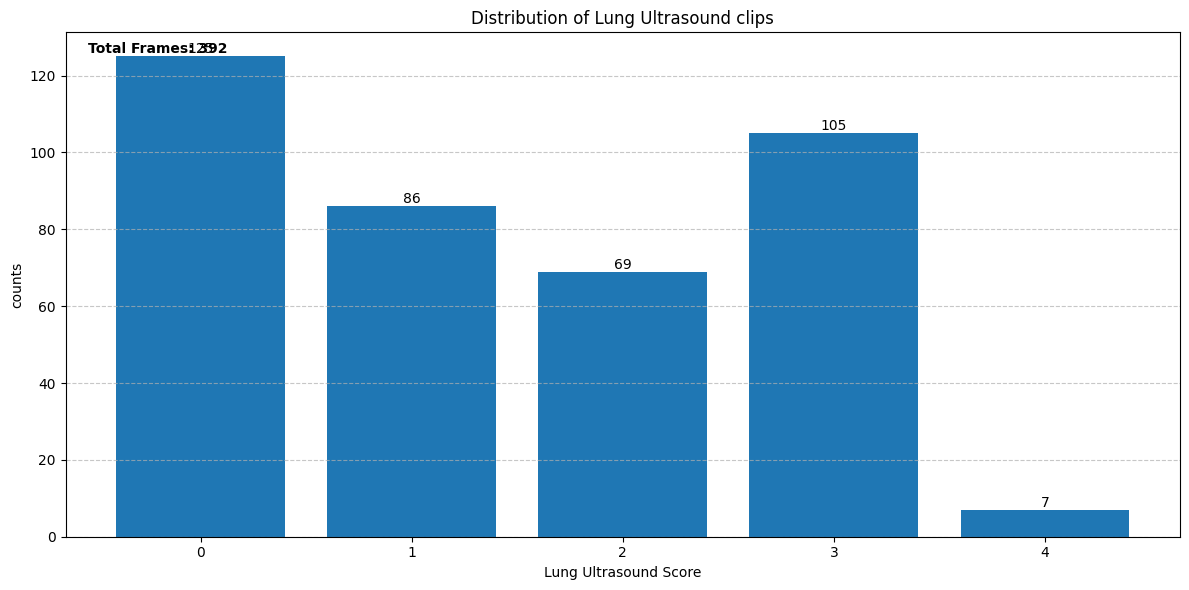

In [238]:
value_counts =  TS_clip_final_df['Lung ultrasound score_lbl'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(value_counts.index, value_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Distribution of Lung Ultrasound clips')
plt.xlabel('Lung Ultrasound Score')
plt.ylabel('counts')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Total frame 수 계산
total_frames = value_counts.sum()

# Total frame 수를 그래프 왼쪽 위에 표시
plt.text(0.02, 0.98, f'Total Frames: {total_frames}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left',
         fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [239]:
total_frames

392

### 5 artifacts
- A-line / B-line, confluent B-line / Consolidation / Effusion / no findings
- 2d-cnn model을 학습시킨 데이터 셋과 동일하게 split 진행

In [240]:
TS_clip_final_df.head()

,256_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl
0,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0
1,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0
2,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0
3,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0
4,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0


In [241]:
TS_clip_final_df[TS_clip_final_df['Confluent B-line_lbl'] == 1].head()

,256_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl
22,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_5,1,1,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2
23,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_5,1,0,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2
26,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_5,1,0,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2
28,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_6,1,0,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2
30,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_6,1,1,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2


In [242]:
TS_clip_final_df['total-B-line_lbl'] = ((TS_clip_final_df['B-line_lbl'] == 1) | (TS_clip_final_df['Confluent B-line_lbl'] == 1)).astype(int)
TS_clip_final_df.head()

,256_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl,total-B-line_lbl
0,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0,0
1,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0,0
2,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0,0
3,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0,0
4,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_2,1,0,0,0,0,/home/work/LUS/Dataset/processed_temporally_se...,0,0


In [243]:
TS_clip_final_df[TS_clip_final_df['Confluent B-line_lbl'] == 1].head()
# TS_clip_final_df[TS_clip_final_df['B-line_lbl'] == 1].head()

,256_clip_path,PatientID,study_id,A-line_lbl,B-line_lbl,Confluent B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,raw_avi_path,Lung ultrasound score_lbl,total-B-line_lbl
22,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_5,1,1,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2,1
23,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_5,1,0,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2,1
26,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_5,1,0,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2,1
28,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_6,1,0,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2,1
30,/home/work/LUS/Dataset/clip_avi_temporally_sep...,44937986,44937986_6,1,1,1,0,0,/home/work/LUS/Dataset/processed_temporally_se...,2,1


In [244]:
if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/clip/5_artifacts'):
    os.makedirs(f'/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/clip/5_artifacts')
TS_clip_final_df.to_csv(f"/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/clip/5_artifacts/temporally_separated_test.csv", index=False)

### 4 artifacts
- A-line / B-line, confluent B-line / Consolidation / Effusion
- 2d-cnn model을 학습시킨 데이터 셋과 동일하게 split 진행

#### version 1

In [245]:
class_4_new_df.head()

,PatientID,Data_idx,StudyDate,Data_type,A-line,B-line,Confluent B-line,Consolidation,Pleural effusion,Lung sliding,...,FileName,A-line_lbl,B-line_lbl,Confluent B-line_lbl,total-B-line_lbl,Consolidation_lbl,Pleural effusion_lbl,img_path,Lung ultrasound score_lbl,raw_avi_path
0,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_1,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN
1,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_2,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN
2,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_3,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN
3,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_4,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN
4,44937986,2,20240712,video,1_152,NaN,NaN,NaN,NaN,1,...,44937986_00002_5,1,0,0,0,0,0,/home/work/LUS/Dataset/temporally_separated_dc...,0,NaN


In [246]:
art4_TS_clip_final_df = TS_clip_final_df[TS_clip_final_df['Lung ultrasound score_lbl'] != 4]

In [247]:
print(f'5 artifacts counts : {len(TS_clip_final_df)}')
print(f'score 4 counts : {len(TS_clip_final_df[TS_clip_final_df["Lung ultrasound score_lbl"] == 4])}')
print(f'4 artifacts counts : {len(art4_TS_clip_final_df)}')

5 artifacts counts : 392
score 4 counts : 7
4 artifacts counts : 385


In [248]:
art4_TS_clip_final_df['total-B-line_lbl'] = ((art4_TS_clip_final_df['B-line_lbl'] == 1) | (art4_TS_clip_final_df['Confluent B-line_lbl'] == 1)).astype(int)
art4_TS_clip_final_df.head()
print(len(art4_TS_clip_final_df))

385


/tmp/ipykernel_4033221/2389611354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art4_TS_clip_final_df['total-B-line_lbl'] = ((art4_TS_clip_final_df['B-line_lbl'] == 1) | (art4_TS_clip_final_df['Confluent B-line_lbl'] == 1)).astype(int)


In [249]:
if not os.path.exists(f'/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/clip/4_artifacts'):
    os.makedirs(f'/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/clip/4_artifacts')
art4_TS_clip_final_df.to_csv(f"/home/work/LUS/Dataset/csv_files/temporally_separated_test_set/clip/4_artifacts/temporally_separated_test.csv", index=False)

In [250]:
art4_TS_clip_final_df['Lung ultrasound score_lbl'].value_counts()

0    125
3    105
1     86
2     69
Name: Lung ultrasound score_lbl, dtype: int64